In [392]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [393]:
with open('./input/data/wikipedia_documents.json', 'r') as f:
    wiki = json.load(f)

### ▶︎ Retrieval 문서 데이터

In [394]:
wiki['0']

{'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.',
 'corpus_source': '위키피디아',
 'url': 'TODO',
 'domain': None,
 'title': '나라 목록',
 'author': None,
 'html': None,
 'document_id': 0}

In [431]:
len(wiki)

60613

In [73]:
# values() 확인
for i, v in enumerate(wiki.values()):
    #print(v, end='\n=====================\n')
    if i == 3: break

In [77]:
# 문서 내용 None은 없다.
for v in wiki.values():
    if v['text'] is None:
        print(v)

In [78]:
# 중복 제거된 문서 데이터 리스트 만들기
contexts = list(dict.fromkeys([wiki_data["text"] for wiki_data in wiki.values()]))    # 중복 제거
print('context len :', len(contexts))
print('wiki data len :', len(wiki))

context len : 56737
wiki data len : 60613


In [83]:
each_context_len = [len(text) for text in contexts]
wiki_contexts = pd.DataFrame(np.array([contexts, each_context_len]).T, columns=['context', 'len'])

<AxesSubplot: >

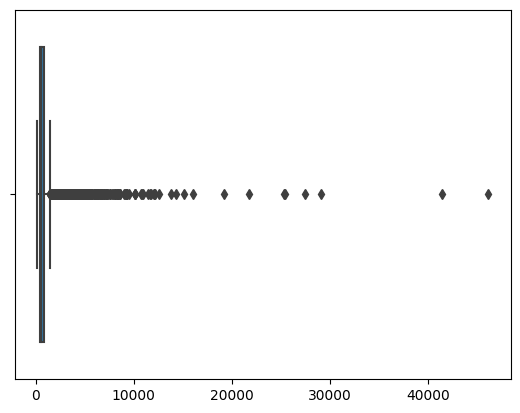

In [96]:
# 각 문서별 길이 box plot
sns.boxplot(x=each_context_len)

In [260]:
temp = []
for x in each_context_len:
    if x < 1000:
        temp.append(x)

<AxesSubplot: >

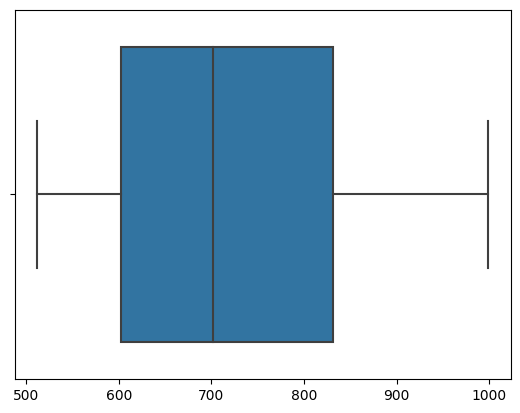

In [261]:
sns.boxplot(x=temp)

## MRC train data EDA

In [429]:
from datasets import load_from_disk
train = load_from_disk("./input/data/train_dataset/train/")
valid = load_from_disk("./input/data/train_dataset/validation/")
print(train)

Dataset({
    features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
    num_rows: 3952
})


In [339]:
train[0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [428]:
# train dataset's describe()
each_context_len = [len(text) for text in train['context']]
each_qa_len = [len(qa) for qa in train['question']]
each_ans_len = []
for ans in train['answers']:
    each_ans_len.append(len(*ans['text']))
describe_df = pd.DataFrame(np.array([each_context_len, each_qa_len, each_ans_len]).T, columns=['context_len', 'qa_len', 'ans_len'])

describe_df.describe()

,context_len,qa_len,ans_len
count,3952.000000,3952.000000,3952.000000
mean,920.220648,29.322368,6.275051
std,356.500514,8.727421,5.346842
min,512.000000,8.000000,1.000000
25%,645.000000,23.000000,3.000000
50%,819.000000,29.000000,5.000000
75%,1099.250000,35.000000,8.000000
max,2059.000000,78.000000,83.000000


In [430]:
# validation dataset's describe()
each_context_len = [len(text) for text in valid['context']]
each_qa_len = [len(qa) for qa in valid['question']]
each_ans_len = []
for ans in valid['answers']:
    each_ans_len.append(len(*ans['text']))
describe_df = pd.DataFrame(np.array([each_context_len, each_qa_len, each_ans_len]).T, columns=['context_len', 'qa_len', 'ans_len'])

describe_df.describe()

,context_len,qa_len,ans_len
count,240.000000,240.000000,240.000000
mean,916.725000,29.195833,6.912500
std,360.032122,8.728301,6.858755
min,517.000000,9.000000,1.000000
25%,616.750000,23.000000,3.000000
50%,820.500000,29.000000,5.000000
75%,1107.250000,35.000000,8.000000
max,2064.000000,59.000000,64.000000


In [432]:
# wiki dataset's describe()
each_text_len = []
for i in range(len(wiki)):
    each_text_len.append(len(wiki[str(i)]['text']))
each_title_len = []
for i in range(len(wiki)):
    each_title_len.append(len(wiki[str(i)]['title']))
describe_df = pd.DataFrame(np.array([each_text_len, each_title_len]).T, columns=['text_len', 'title_len'])

describe_df.describe()

,text_len,title_len
count,60613.000000,60613.000000
mean,755.565044,7.801676
std,762.962671,4.819491
min,184.000000,1.000000
25%,414.000000,4.000000
50%,577.000000,7.000000
75%,857.000000,10.000000
max,46099.000000,96.000000


In [120]:
# 중복제거 제목 개수
pd.Series(train['title']).value_counts()

윤치호                43
장면                 24
여운형                23
데카메론의 줄거리          13
루트비히 비트겐슈타인        13
                   ..
태고의 달인의 등장인물 목록     1
나가시마 시게오            1
화순 유마사 해련탑          1
가남풍                 1
빈 필하모니 관현악단         1
Length: 2716, dtype: int64

In [121]:
pd.Series(train['question']).value_counts()
# 질문은 중복 x

대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?                              1
거대도시에서 가족의 해체, 각종 범죄, 정신적 질환 등이 특별히 많아지는 것은 무엇이 충돌되기 때문인가?    1
1966년 처음으로 운행된 베이역은 블루어에서 어디까지 운행되었나?                         1
제11장갑사단이 우회시킨 부대는?                                            1
함경북도에서 유일하게 철도가 없는 군은?                                        1
                                                             ..
미국 관세사들이 짝퉁 판매 사이트를 제재한 시기는?                                  1
사탄이 따뜻한 마음을 가진 주인공으로 등장하는 작품은 무엇인가?                           1
나치 강제 수용소 수감자 중 가장 높은 비율을 차지한 민족은?                            1
7월 4일 북한군이 전투를 벌인곳은?                                          1
올레 폰 보이스트 이후에 시장으로 임명된 사람은 누구인가?                              1
Length: 3952, dtype: int64

In [124]:
pd.Series(train['answers']).value_counts()

{'answer_start': [370], 'text': ['나가타']}             2
{'answer_start': [270], 'text': ['제트팬이 설치된 종류식']}    2
{'answer_start': [445], 'text': ['화산암']}             2
{'answer_start': [131], 'text': ['1975년']}           2
{'answer_start': [248], 'text': ['미국']}              2
                                                    ..
{'answer_start': [166], 'text': ['7월 29일']}          1
{'answer_start': [627], 'text': ['2009년']}           1
{'answer_start': [182], 'text': ['"사우스 파크"']}        1
{'answer_start': [181], 'text': ['유태인']}             1
{'answer_start': [189], 'text': ['크리스토포 알하우스']}      1
Length: 3926, dtype: int64

In [295]:
# answer text 답변에 None값이 존재하는가?
original_answer = []
for answer in train['answers']:
    original_answer.append(dict.fromkeys(answer['text']))
    if answer['text'] is None:
        print('There is None')          
        # 결과: None 존재 x 

In [296]:
len(original_answer)     # answer는 중복 x // context는 중복되어도 질문과 답이 중복된 경우는 없다. = 한 context 안에서 여러 질문을 뽑아 다른 답을 뽑아내었다.

3952

In [281]:
# context 데이터 확인
original_context = list(dict.fromkeys(text for text in train['context']))

In [293]:
# context는 같은데 title이 다른 경우가 있을까?
unique_context = dict.fromkeys(text for text in train['context'])  
for text, title in zip(train['context'], train['title']):
    if text in unique_context and unique_context[text] is None:
        unique_context[text] = title
    elif text in unique_context and unique_context[text] is not None and unique_context[text] != title:
        print('[title 중복]')
        print(f'context : {text} \n\n 키-값에 저장되어있던 제목 : {unique_context[text]} \n\n 중복된 제목: {title}')

[title 중복]
context : 고난의 행군 이후 국가 과학원은 예산 체계로 운영이 되었음을 알수가 있었으나 2002년 7.1 경제개혁조치 이후로 집적회로 시험 공장을 비롯한 모든 중간 공장 생산품을 수익 창출 방향으로 연구와 생산 방향을 정할 수 있도록 독립 채산제를 전면적으로 실시를 하였다.\n\n그리고 이것을 통하여 집적회로 시험 공장 역시 집적회로 생산품을 특히 자체 자산을 마련하기 위하여 파운드리할 수 있는 발판을 마련할 수 있도록 설정을 하였고 특히 군수품을 납품할 때 국정 가격으로 납품이 가능하도록 설정을 하였다.\n\n특히 여기에서 운영하는 연구원들을 다른 공장에 전출이나 혹은 그런데로 진출을 할때 생산에 직접적인 영향을 주게끔 훈련을 시킬 수 있다.\n\n그리고 조선민주주의인민공화국은 여기를 발판으로 Glocom을 발판으로 설계를 하여 평양 집적회로 시험 공장에 파운드리를 할 수 있는 기반을 가지고 있으며 그만큼 조선민주주의인민공화국은 자체 자산을 위한 발판을 마련하여 자체 수익 방향을 결정할 수 있는 권한을 가지고 있으며 계획외 30% 생산도 국정 가격으로 공급할 수 있다. 

 키-값에 저장되어있던 제목 : 조선백송회사 

 중복된 제목: 조선련봉총회사


In [244]:
print('context 중복 제거 전 데이터 개수 :', len(train['context']))
print('context 중복 제거 후 데이터 개수 :', len(original_context))

context 중복 제거 전 데이터 개수 : 3952
context 중복 제거 후 데이터 개수 : 3340


In [412]:
# mrc train 데이터의 각 context 별 길이 확인 
each_context_len = [len(text) for text in train['context']]
mrc_contexts = pd.DataFrame(np.array([train['context'], each_context_len]).T, columns=['context', 'len'])

<AxesSubplot: >

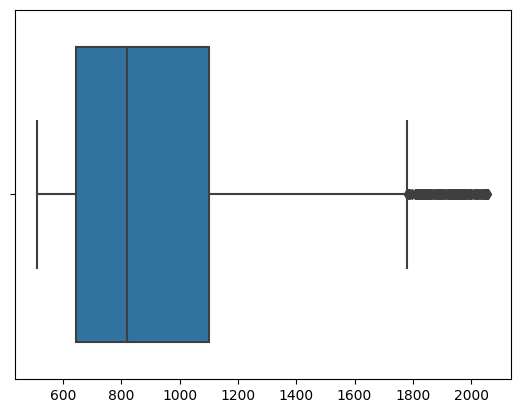

In [242]:
sns.boxplot(x=each_context_len)

### context 및 answer의 text를 토크나이저가 잘 인식하는지 확인

In [665]:
from transformers import AutoTokenizer

model_name = 'klue/roberta-large'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [666]:
text = train['context'][2]
text

'강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전제 독재의 가능성이 보일 수도 있었으나, 스스로 황권을 조절하고 정치의 일부는 재상들이나 대신들과 의논하였으며 당시 궁핍하게 살고 있는 한족들의 사정을 잘 알고 있던 한족 대신들의 의견을 수용하여 정책을 실행하고 선정을 베풀었다. 프랑스의 예수회 선교사 부베는 루이 14세에게 다음과 같이 보고하였다. \\n강희제는 세상에서 가장 부유한 군주입니다. 그럼에도 황제인 그의 생활용품들은 사치스러움과 화려함과는 거리가 멀다 못해 소박하기 그지없습니다. 역대 제왕들 가운데 전례없는 일입니다.\\n강희제 스스로도 자신이 직접 쓴 《근검록》에서 다음과 같이 쓰고 있다\\n모든 비용은 백성들의 피땀으로 얻어진 것이니 주인된 황제로서 절제하고 절제함은 당연한 것이 아닌가\\n\\n이런 강희제의 인자한 정치는 한족이 만주족의 청나라를 지지하게 만드는 데에 크게 일조하였다. 1717년(강희 56년) 강희제는 〈고별상유〉(告別上諭), 즉 마지막으로 백성들에게 바치는 글을 남겼는데 강희제는 “한 가지 일에 부지런하지 않으면 온 천하에 근심을 끼치고, 한 순간에 부지런하지 않으면 천추만대에 우환거리를 남긴다.”라고 역설하였다. 또한 “제왕이 천하를 다스림에 능력이 있는 자를 가까이 두고, 백성들의 세금을 낮추어 주어야 하며, 백성들의 마음을 하나로 묶고, 위태로움이 생기기 전에 나라를 보호하며, 혼란이 있기 전에 이를 먼저 파악하여 잘 다스리고, 관대하고 엄격함의 조화를 이루어 나라를 위한 계책을 도모해야 한다.”라고 후대의 황제에게도 이를 훈계하였다. 강희제는 황제로서 자식과 같은 백성들에게 이런 당부의 말을 남겨 황제로서의 도리를 다하려 하였다.'

In [672]:
#tokenizer.tokenize(text)

In [ ]:
temp = []
for context in train['context']:
    # [warn] token indices sequence length is longer than the specified maximum sequence length
    if len(context) > 512:
        seq = context[:512]
        seq2 = context[512:]
        temp.extend(tokenizer.tokenize(seq))
        temp.extend(tokenizer.tokenize(seq2))
    else:
        temp.extend(tokenizer.tokenize(context))

In [673]:
# 모든 context의 토크나이징 후 가장 빈도수 높은 글자들
token_counts = pd.Series(temp).value_counts()
#token_counts

In [347]:
token_counts['[UNK]']
# unk의 개수는 28279개

28279

In [348]:
print('model name :', model_name)
print('data의 총 토큰 개수 :', len(temp))
print('[UNK] 토큰 개수 :', token_counts['[UNK]'])

model name : klue/roberta-large
data의 총 토큰 개수 : 1958288
[UNK] 토큰 개수 : 28279


## ▶︎ [UNK] 토큰 줄이기! 
- unk로 치환되는 단어가 무엇이 있는지 확인하기 (빈도수 나열)

In [366]:
context = train['context'][2]
tokens = tokenizer.tokenize(context)
context_split = context.split()
# getUNK(tokens, context_split)

In [352]:
example_text = train['context'][2]
' '.join(tokenizer.tokenize(example_text)).replace('##', '')

'강희 제 는 강화 된 황 권 으로 거의 황제 중심 의 독단 적으로 나라 를 이끌 어 갔 기에 자칫 전제 독재 의 가능 성이 보일 수도 있 었 으나 , 스스로 황 권 을 조절 하고 정치 의 일부 는 재상 들이 나 대신 들 과 의논 하 였 으며 당시 궁핍 하 게 살 고 있 는 한족 들 의 사정 을 잘 알고 있 던 한족 대신 들 의 의견 을 수용 하여 정책 을 실행 하고 선정 을 베풀 었 다 . 프랑스 의 예수 회 선교사 부 베 는 루이 14 세 에 게 다음 과 같이 보고 하 였 다 . [UNK] n 강 희 제 는 세상 에서 가장 부유 한 군주 입니다 . 그럼에도 황제 인 그 의 생활 용품 들 은 사치 스 러움 과 화려 함 과 는 거리 가 멀 다 못해 소박 하기 그지없 습 니다 . 역대 제왕 들 가운데 전례 없 는 일 입니다 . [UNK] n 강 희 제 스스로 도 자신 이 직접 쓴 《 근 검 록 》 에서 다음 과 같이 쓰 고 있 다 [UNK] n 모 든 비용 은 백성 들 의 피 땀 으로 얻어 진 것 이 니 주인 된 황제 로 서 절제 하고 절제 함 은 당연 한 것 이 아닌가 [UNK] n [UNK] n 이 런 강희 제 의 인자 한 정치 는 한족 이 만주 족 의 청나라 를 지지 하 게 만드 는 데 에 크 게 일조 하 였 다 . 171 7 년 ( 강희 56 년 ) 강희 제 는 〈 고 별 상 유 〉 ( 告 別 上 [UNK] ) , 즉 마지막 으로 백성 들 에 게 바치 는 글 을 남겼 는데 강희 제 는 “ 한 가지 일 에 부지런 하 지 않 으면 온 천하 에 근심 을 끼치 고 , 한 순간 에 부지런 하 지 않 으면 천 추 만 대 에 우 환 거리 를 남긴다 . ” 라고 역설 하 였 다 . 또한 “ 제왕 이 천하 를 다스 림 에 능력 이 있 는 자 를 가까이 두고 , 백성 들 의 세금 을 낮추 어 주어 야 하 며 , 백성 들 의 마음 을 하나 로 묶 고 , 위태 로움 이 생기 기 전 에 나라 를 보호 하 며 , 혼란 이 있 기 전 에 이를 먼저 파악 하여 잘 다스리 고 , 관대

## ▶︎ [UNK] 토큰 복원하기
- 새로운 토크나이저 학습

In [370]:
from transformers import AutoTokenizer

model_name = 'klue/roberta-large'
old_tokenizer = AutoTokenizer.from_pretrained(model_name)

In [371]:
tokenizer = old_tokenizer.train_new_from_iterator(train['context'], 3952)

In [465]:
def concat_shap(tokenize_text):
    restore = [tokenize_text[0]]                                      # 복원된 문장
    word_index = 0         # ## 인 경우에 앞 단어와 붙여야하므로 복원 문장 안에서의 앞단어 index
    for i in range(1, len(tokenize_text)):
        # post_token = tokenize_text[i-1]
        if '##' in tokenize_text[i]:
            # 앞 단어와 합치기
            restore[word_index] = restore[word_index] + tokenize_text[i].replace('##', '')
        else:
            # if tokenize_text[i] == '[UNK]':
            restore.append(tokenize_text[i])
            word_index += 1  
            
    return restore

In [471]:
# test용
text = train['context'][3]
new_tokens = tokenizer.tokenize(text)          # new tokenizer
old_tokens = old_tokenizer.tokenize(text)      # old tokenizer

restore_new = concat_shap(new_tokens)
restore_old = concat_shap(old_tokens)

unks = []

for k in range(len(restore_old)):
        if restore_old[k] != restore_new[k]:
            print(f'token : {restore_old[k]}')
            print(f'원본 문자 : {restore_new[k]}')
            unks.append(restore_new[k])

print(unks)

token : [UNK]
원본 문자 : 龕
token : [UNK]
원본 문자 : \
token : [UNK]
원본 문자 : \
token : [UNK]
원본 문자 : \
token : [UNK]
원본 문자 : \
token : [UNK]
원본 문자 : 背
token : [UNK]
원본 문자 : 冠
token : [UNK]
원본 문자 : \
token : [UNK]
원본 문자 : \
token : [UNK]
원본 문자 : 冠
['龕', '\\', '\\', '\\', '\\', '背', '冠', '\\', '\\', '冠']


In [581]:
new_all_context_tokens = []
old_all_context_tokens = []
for context in train['context']:
    # [warn] token indices sequence length is longer than the specified maximum sequence length
    if len(context) > 512:
        seq = context[:512]
        seq2 = context[512:]
        new_all_context_tokens.extend(tokenizer.tokenize(seq))
        new_all_context_tokens.extend(tokenizer.tokenize(seq2))
        old_all_context_tokens.extend(old_tokenizer.tokenize(seq))
        old_all_context_tokens.extend(old_tokenizer.tokenize(seq2))
    else:
        new_all_context_tokens.extend(tokenizer.tokenize(context))
        old_all_context_tokens.extend(old_tokenizer.tokenize(context))

restore_new = concat_shap(new_all_context_tokens)
restore_old = concat_shap(old_all_context_tokens)

train_unks = []

for k in range(len(restore_old)):
        if restore_old[k] != restore_new[k]:
            # print(f'token : {restore_old[k]}')
            # print(f'원본 문자 : {restore_new[k]}')
            train_unks.append(restore_new[k])


### unk 토큰의 본래 문자 확인하기 (빈도수대로)

In [623]:
from collections import Counter
from pprint import pprint

unks_count = Counter(train_unks)
pprint(unks_count)
# df = pd.DataFrame.from_dict(unks_count, orient='index').reset_index()
# df.columns = ['unk','count']
# df

Counter({'\\': 22808,
         '–': 56,
         '李': 30,
         '臺': 26,
         '頭': 25,
         '臨': 21,
         '呂': 20,
         '皇': 19,
         '半': 18,
         '番': 18,
         '国': 16,
         '像': 16,
         '里': 16,
         '郡': 16,
         '衣': 16,
         '領': 16,
         '秦': 15,
         '陳': 15,
         '加': 14,
         '홋카이도': 14,
         '塔': 14,
         '侯': 14,
         '촐라': 14,
         '座': 13,
         '遷': 13,
         '背': 12,
         '冠': 12,
         '뮈라는': 12,
         '毛': 12,
         '封': 12,
         '趙': 12,
         '造': 11,
         '壇': 11,
         '刀': 11,
         '衛': 11,
         '派': 11,
         '組': 11,
         '印': 10,
         '宋': 10,
         '祭': 10,
         '姓': 10,
         '橋': 10,
         '赤': 10,
         '縣': 10,
         '테뫼식': 10,
         '器': 9,
         '閔': 9,
         '柱': 9,
         '科': 9,
         '陵': 9,
         '없앴다': 9,
         '秀': 9,
         '工': 9,
         '覺': 9,
         '興': 9,
      

### ▶︎ 정답 answer가 context 문서 안에 다 존재할까? (아예 엇나가는 오라벨링 확인 위함)

In [674]:
for i, (answer, context) in enumerate(zip(train['answers'], train['context'])):
    answer_text = str(answer['text'])
    answer_text = answer_text.replace('[','')
    answer_text = answer_text.replace(']','')
    answer_text = answer_text.replace('\'','')
    answer_text = answer_text.replace('"','')
    
    # if context.find(answer_text) == -1:
    #     print(f'answer_text : {answer_text} \n context : {context}')
    #     print('=')

## answer start 위치 분포도 확인

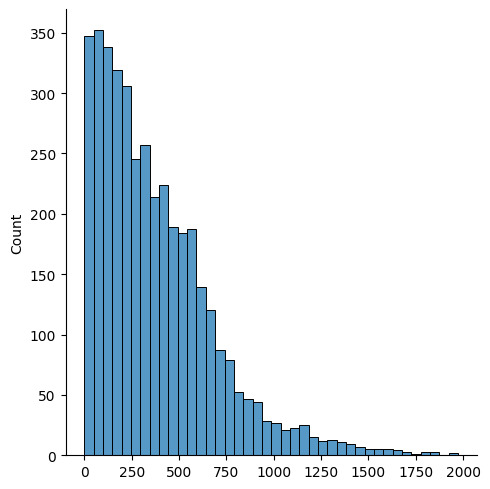

In [451]:
ans_start_list = [ans['answer_start'][0] for ans in train['answers']]
sns.displot(ans_start_list)

## 특수 기호 뽑아내기

In [498]:
wiki['0']

{'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.',
 'corpus_source': '위키피디아',
 'url': 'TODO',
 'domain': None,
 'title': '나라 목록',
 'author': None,
 'html': None,
 'document_id': 0}

In [499]:
train[0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [608]:
# 특수 기호 뽑아내기 (train context) 
import re

special = re.compile(r'[^.,?! A-Za-z0-9가-힣一-龥+]')
res = []
for context in train['context']:
    res.extend(special.findall(context))
                
# pprint(Counter(res))

In [675]:
# 특수 기호 뽑아내기 (train answer text) 
special = re.compile(r'[^.,?! A-Za-z0-9가-힣一-龥+]')
res = []
for ans in train['answers']:
    res.extend(special.findall(*ans['text']))

# pprint(Counter(res))

In [637]:
# 특수 기호 뽑아내기 (wiki) 

special = re.compile(r'[^.,?! A-Za-z0-9가-힣一-龥+]')
res = []
for i in range(len(wiki)):
    for text in wiki[str(i)]['text']:
        res.extend(special.findall(text))

# pprint(Counter(res))
res = Counter(res).most_common()

In [641]:
temp = []
for i in range(len(res)):
    if res[i][1] < 500:
        break
    temp.append(res[i][0])

common_special_symbol = ''.join(temp)
common_special_symbol

'\n()*"-:\'|\\·《》=/~;’‘。#>%<]〈[〉\xa0_”“\uf537}」「『』–\t・&а、\ue285，иоé\ue3a8の×еㆍ\u3000н∼ーр{→\uf53aс\ue1adン\ue470○вㅣ\ue477いт：кáл\ue73b≪≫（ā）α\uf1fc…\ue97d°ü$イм\ue283スا║\uee8cん\ue38aдなト—しと'

In [611]:
# 특수 기호 뽑아내기 (train's unk token 내의 특수문자들) 

special = re.compile(r'[^ A-Za-z0-9가-힣一-龥+]')
res = []
for context in train_unks:
    res.extend(special.findall(context))
                
# pprint(Counter(res))
preprocessing_unk_list = list(set(res))

In [575]:
# answer text 내의 UNK 토큰으로 변환되는 원본 문자 얻기
def getansUNK():
    new_all_ans_tokens = []
    old_all_ans_tokens = []
    for ans in train['answers']:
        for context in ans['text']:
        # [warn] token indices sequence length is longer than the specified maximum sequence length
            if len(context) > 512:
                seq = context[:512]
                seq2 = context[512:]
                new_all_ans_tokens.extend(tokenizer.tokenize(seq))
                new_all_ans_tokens.extend(tokenizer.tokenize(seq2))
                old_all_ans_tokens.extend(old_tokenizer.tokenize(seq))
                old_all_ans_tokens.extend(old_tokenizer.tokenize(seq2))
            else:
                new_all_ans_tokens.extend(tokenizer.tokenize(context))
                old_all_ans_tokens.extend(old_tokenizer.tokenize(context))


    restore_new = concat_shap(new_all_ans_tokens)
    restore_old = concat_shap(old_all_ans_tokens)

    ans_unks = []

    for k in range(len(restore_old)):
            if restore_old[k] != restore_new[k]:
                # print(f'token : {restore_old[k]}')
                # print(f'원본 문자 : {restore_new[k]}')
                ans_unks.append(restore_new[k])
                
    return ans_unks

In [615]:
import re

special = re.compile(r'[^ A-Za-z0-9가-힣一-龥+]')
res = []
ans_unks = getansUNK()
for context in ans_unks:
    res.extend(special.findall(context))
                
pprint(Counter(res))
"".join(list(set(res)))

Counter({'よ': 3,
         'う': 3,
         'に': 2,
         'な': 2,
         '∧': 1,
         'ä': 1,
         'の': 1,
         'ら': 1,
         'い': 1,
         'し': 1,
         '°': 1})


'のいら°∧うよäにしな'

In [545]:
old_tokenizer.tokenize('ａｂｃｄｅｆｇｈｉｊｋｌｍｎｏｐｑｒｓｔｕｖｗｘｙｚ')

['[UNK]']

In [604]:
# train data 내의 text를 전처리할 때 answer_start의 위치값도 함께 움직이기 위한 전처리 함수(example)
import re

def preprocessing(sample):
    start_pos_marker = "[SPOS]"
    # < > 로 묶으면 html 제거할 때 같이 제거돼서 [] 로 바꾸었다.
    
    context = sample["context"]
    start_pos = sample["answers"]["answer_start"][0]
    
    ## <SPOS> 붙이기
    context = start_pos_marker.join([context[:start_pos],context[start_pos:]])
    
    ## 필요한 전처리
    context = re.sub(r"\\n"," ", context)
    context = re.sub(r"<[^>]+>\s+(?=<)|<[^>]+>", "", context).strip()        # remove html code
    
    
    ## <SPOS>의 위치를 저장하기
    sample["answers"]["answer_start"][0] = context.index(start_pos_marker)
    
    ## <SPOS>를 뺀 나머지의 context를 저장하기
    sample["context"] = re.sub(start_pos_marker,"", context)
    
    return sample